# Project 3 Sandbox-Blue-O, NLP using webscraping to create the dataset

## Objective: Determine if posts are in the SpaceX Subreddit or the Blue Origin Subreddit

We'll utilize the RESTful API from pushshift.io to scrape subreddit posts from r/blueorigin and r/spacex and see if we cannot use the Bag-of-words algorithm to predict which posts are from where.

Author: Matt Paterson, hello@hiremattpaterson.com

This notebook is the SANDBOX and should be used to play around.  The formal presentation will be in a different notebook


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import lebowski as dude

from sklearn.feature_extraction.text import CountVectorizer
import re, regex


In [2]:
# Establish a connection to the API and search for a specific keyword. Maybe we'll add this function to the
# lebowski library? Or maybe make a new and slicker Library called spaceman or something
# CREDIT: code below adapted from Riley Dallas Lesson on webscraping

# keyword = 'propulsion'
# url_boeing = 'https://api.pushshift.io/reddit/search/comment/?q=' + keyword + '&subreddit=boeing'
# res = requests.get(url_boeing)
# res.status_code


In [3]:
# instantiate a Beautiful Soup object for Boeing
#boeing = BeautifulSoup(res.content, 'lxml')

In [4]:
#boeing.find("body")

In [5]:
spacex = dude.create_lexicon('spacex', 5000)

connection nominal
Added in 100 new rows
List contains 100 rows
connection nominal
Added in 100 new rows
List contains 200 rows
connection nominal
Added in 100 new rows
List contains 300 rows
connection nominal
Added in 100 new rows
List contains 400 rows
connection nominal
Added in 100 new rows
List contains 500 rows
connection nominal
Added in 100 new rows
List contains 600 rows
connection nominal
Added in 100 new rows
List contains 700 rows
connection nominal
Added in 100 new rows
List contains 800 rows
connection nominal
Added in 100 new rows
List contains 900 rows
connection nominal
Added in 100 new rows
List contains 1000 rows
connection nominal
Added in 100 new rows
List contains 1100 rows
connection nominal
Added in 100 new rows
List contains 1200 rows
connection nominal
Added in 100 new rows
List contains 1300 rows
connection nominal
Added in 100 new rows
List contains 1400 rows
connection nominal
Added in 100 new rows
List contains 1500 rows
connection nominal
Added in 100 ne

In [7]:
blueorigin = dude.create_lexicon('blueorigin', 5000)

connection nominal
Added in 100 new rows
List contains 100 rows
connection nominal
Added in 100 new rows
List contains 200 rows
connection nominal
Added in 100 new rows
List contains 300 rows
connection nominal
Added in 100 new rows
List contains 400 rows
connection nominal
Added in 100 new rows
List contains 500 rows
connection nominal
Added in 100 new rows
List contains 600 rows
connection nominal
Added in 100 new rows
List contains 700 rows
connection nominal
Added in 100 new rows
List contains 800 rows
connection nominal
Added in 98 new rows
List contains 898 rows
connection nominal
Added in 100 new rows
List contains 998 rows
connection nominal
Added in 100 new rows
List contains 1098 rows
connection nominal
Added in 100 new rows
List contains 1198 rows
connection nominal
Added in 100 new rows
List contains 1298 rows
connection nominal
Added in 100 new rows
List contains 1398 rows
connection nominal
Added in 100 new rows
List contains 1498 rows
connection nominal
Added in 100 new 

In [9]:
spacex.head()

,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_text,author_flair_text_color,awarders,banned_by,can_mod_post,...,author_cakeday,distinguished,gilded,event_end,event_is_live,event_start,media_metadata,steward_reports,removed_by,updated_utc
0,[],False,[deleted],,None,None,dark,[],moderators,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Nodeity59,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Leved4,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,dannylenwinn,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,rustybeancake,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
blueorigin.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,distinguished,approved_at_utc,banned_at_utc,view_count,author_created_utc,link_flair_css_class,link_flair_text,banned_by,mod_reports,user_reports
0,[],False,Ilovedonutss,None,[],None,text,t2_za7uc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,meanpeoplesuck96,None,[],None,text,t2_164yw13r,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,leggomyreggo,None,[],None,text,t2_33s7emo,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,ragner11,None,[],None,text,t2_yj18e,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Donthaveagoodnametho,None,[],None,text,t2_e1cvp,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
spacex[['subreddit', 'selftext', 'title']].head()   # predict the subreddit column

,subreddit,selftext,title
0,spacex,NaN,Are humans really a multi-planetary species ?
1,spacex,[removed],Boca Chica in the path of a Hurricane?
2,spacex,,An accident has happened
3,spacex,,It's Time To Launch Hawaii's Aerospace Industr...
4,spacex,,Eric Berger on Twitter: “NASA is currently tar...


In [12]:
blueorigin[['subreddit', 'selftext', 'title']].head()   # predict the subreddit column

,subreddit,selftext,title
0,BlueOrigin,,Virgin Galactic: Don't Buy Richard Branson's L...
1,BlueOrigin,,Just posted a new video! Would love to hear yo...
2,BlueOrigin,Just want some advice in my upcoming technical...,Upcoming Technical Interview need advice
3,BlueOrigin,,"LC-36 progress, lighting tower has received it..."
4,BlueOrigin,Seems that they've got some exciting developme...,How possible would it be that the development ...


In [13]:
print('Soux City Sarsparilla?') # silly print statement to check progress of long print

Soux City Sarsparilla?


In [14]:
spacex_comments = dude.create_lexicon('spacex', 5000, post_type='comment')

connection nominal
Added in 100 new rows
List contains 100 rows
connection nominal
Added in 100 new rows
List contains 200 rows
connection nominal
Added in 100 new rows
List contains 300 rows
connection nominal
Added in 100 new rows
List contains 400 rows
connection nominal
Added in 100 new rows
List contains 500 rows
connection nominal
Added in 100 new rows
List contains 600 rows
connection nominal
Added in 100 new rows
List contains 700 rows
connection nominal
Added in 100 new rows
List contains 800 rows
connection nominal
Added in 100 new rows
List contains 900 rows
connection nominal
Added in 100 new rows
List contains 1000 rows
connection nominal
Added in 100 new rows
List contains 1100 rows
connection nominal
Added in 100 new rows
List contains 1200 rows
connection nominal
Added in 100 new rows
List contains 1300 rows
connection nominal
Added in 100 new rows
List contains 1400 rows
connection nominal
Added in 100 new rows
List contains 1500 rows
connection nominal
Added in 100 ne

In [15]:
spacex_comments.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,edited,author_cakeday,distinguished
0,[],None,CarbonSack,None,None,[],None,None,None,text,...,True,False,spacex,t5_2srow,None,0,[],NaN,NaN,NaN
1,[],None,scuba21,None,None,[],None,None,None,text,...,True,False,spacex,t5_2srow,None,0,[],NaN,NaN,NaN
2,[],None,[deleted],,None,NaN,None,None,dark,NaN,...,True,False,spacex,t5_2srow,None,0,[],NaN,NaN,NaN
3,[],None,RobotSquid_,None,None,[],None,None,None,text,...,True,False,spacex,t5_2srow,None,0,[],NaN,NaN,NaN
4,[],None,MaxSizeIs,None,None,[],None,None,None,text,...,True,False,spacex,t5_2srow,None,0,[],NaN,NaN,NaN


In [16]:
spacex_comments[['subreddit', 'body']].head()   # predict the subreddit column

,subreddit,body
0,spacex,Starliner didn’t make the list :(
1,spacex,"Hovercraft make lots of their own wind, making..."
2,spacex,[deleted]
3,spacex,Didn't Scott famously get really moody at the ...
4,spacex,Preburner still makes fire and exhaust. It's ...


In [17]:
blueorigin_comments = dude.create_lexicon('blueorigin', 5000, post_type='comment')

connection nominal
Added in 100 new rows
List contains 100 rows
connection nominal
Added in 100 new rows
List contains 200 rows
connection nominal
Added in 100 new rows
List contains 300 rows
connection nominal
Added in 100 new rows
List contains 400 rows
connection nominal
Added in 100 new rows
List contains 500 rows
connection nominal
Added in 100 new rows
List contains 600 rows
connection nominal
Added in 100 new rows
List contains 700 rows
connection nominal
Added in 100 new rows
List contains 800 rows
connection nominal
Added in 100 new rows
List contains 900 rows
connection nominal
Added in 100 new rows
List contains 1000 rows
connection nominal
Added in 100 new rows
List contains 1100 rows
connection nominal
Added in 100 new rows
List contains 1200 rows
connection nominal
Added in 100 new rows
List contains 1300 rows
connection nominal
Added in 100 new rows
List contains 1400 rows
connection nominal
Added in 100 new rows
List contains 1500 rows
connection nominal
Added in 100 ne

In [19]:
blueorigin_comments[['subreddit', 'body']].head()   # predict the subreddit column

,subreddit,body
0,BlueOrigin,I don't know why they would want to waste prop...
1,BlueOrigin,Haha what if we stole one of his houses?
2,BlueOrigin,He made a comment about New Glenn being late w...
3,BlueOrigin,Bezos such a tease.
4,BlueOrigin,Engineering interviews typically assess your c...


In [20]:
blueorigin_comments.columns

Index(['all_awardings', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'body', 'collapsed_because_crowd_control', 'created_utc', 'gildings',
       'id', 'is_submitter', 'link_id', 'locked', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'send_replies', 'stickied',
       'subreddit', 'subreddit_id', 'top_awarded_type',
       'total_awards_received', 'treatment_tags', 'edited', 'author_cakeday'],
      dtype='object')

There's not a "title" column in the comments dataframe, so how is the comment tied to the original post?  

In [21]:
# View the first entry in the dataframe and see if you can find that answer
# permalink?
blueorigin_comments.iloc[0]

all_awardings                                                                     []
associated_award                                                                None
author                                                              ClathrateRemonte
author_flair_background_color                                                   None
author_flair_css_class                                                          None
author_flair_richtext                                                             []
author_flair_template_id                                                        None
author_flair_text                                                               None
author_flair_text_color                                                         None
author_flair_type                                                               text
author_fullname                                                           t2_fohbn42
author_patreon_flair                                             

IN EDA below, we find: "We have empty rows in 'body' in many columns.  It's likely that all of those are postings, not comments, and we should actually map the postings to the body for those before merging the datafrmes."

In [22]:
def strip_and_rep(word):
    if len(str(word).strip().replace(" ", "")) < 1:
        return 'replace_me'
    else:
        return word


In [23]:
blueorigin['selftext'] = blueorigin['selftext'].map(strip_and_rep)
spacex['selftext'] = spacex['selftext'].map(strip_and_rep)

In [24]:
spacex.selftext.isna().sum()

37

In [25]:
blueorigin.selftext.isna().sum()

3

In [26]:
blueorigin.selftext.head()

0                                           replace_me
1                                           replace_me
2    Just want some advice in my upcoming technical...
3                                           replace_me
4    Seems that they've got some exciting developme...
Name: selftext, dtype: object

In [27]:
spacex.iloc[2300:2320]

,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_text,author_flair_text_color,awarders,banned_by,can_mod_post,...,author_cakeday,distinguished,gilded,event_end,event_is_live,event_start,media_metadata,steward_reports,removed_by,updated_utc
2300,[],False,adonaisf,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2301,[],False,adonaisf,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2302,[],False,ManoSann,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2303,[],False,ElongatedMuskrat,,contributor,r/SpaceX Bot,dark,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2304,[],False,space_x_news,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2305,[],False,BlandQuirkyCzech,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2306,[],False,oh_dear_its_crashing,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307,[],False,Internal-Instruction,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2308,[],False,Oneskies,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2309,[],False,SPINIFLOW,NaN,None,None,NaN,[],NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
blo_coms = blueorigin_comments[['subreddit', 'body', 'permalink']]

blo_posts = blueorigin[['subreddit', 'selftext', 'permalink']].copy()

spx_coms = spacex_comments[['subreddit', 'body', 'permalink']]

spx_posts = spacex[['subreddit', 'selftext', 'permalink']].copy()

In [29]:
#blueorigin['selftext'][len(blueorigin['selftext'])>0]
type(blueorigin.selftext.iloc[1])

str

In [30]:
blo_posts.rename(columns={'selftext': 'body'}, inplace=True)

In [31]:
spx_posts.rename(columns={'selftext': 'body'}, inplace=True)

In [35]:
# result = pd.concat(frames)

space_wars_2 = pd.concat([blo_coms, blo_posts, spx_coms, spx_posts])

In [36]:
space_wars_2.shape

(14244, 3)

In [37]:
space_wars_2.head()

,subreddit,body,permalink
0,BlueOrigin,I don't know why they would want to waste prop...,/r/BlueOrigin/comments/hoc1in/is_there_a_blue_...
1,BlueOrigin,Haha what if we stole one of his houses?,/r/BlueOrigin/comments/hus5ng/just_posted_a_ne...
2,BlueOrigin,He made a comment about New Glenn being late w...,/r/BlueOrigin/comments/gg9748/official_questio...
3,BlueOrigin,Bezos such a tease.,/r/BlueOrigin/comments/hsm4um/lc36_progress_li...
4,BlueOrigin,Engineering interviews typically assess your c...,/r/BlueOrigin/comments/hu1qh8/upcoming_technic...


In [38]:
dude.show_details(space_wars_2)

Accessing quick look at {dataframe}
{dataframe}.head(2)
>>>     subreddit                                               body  \
0  BlueOrigin  I don't know why they would want to waste prop...   
1  BlueOrigin           Haha what if we stole one of his houses?   

                                           permalink  
0  /r/BlueOrigin/comments/hoc1in/is_there_a_blue_...  
1  /r/BlueOrigin/comments/hus5ng/just_posted_a_ne...  


{dataframe}.isna().sum()
>>> subreddit     0
body         40
permalink     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14244 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  14244 non-null  object
 1   body       14204 non-null  object
 2   permalink  14244 non-null  object
dtypes: object(3)
memory usage: 445.1+ KB


{dataframe}.info()
>>> None

{dataframe}.shape (14244, 3)


We have empty rows in 'body' in many columns.  It's likely that all of those are postings, not comments, and we should actually map the postings to the body for those before merging the datafrmes.  

However, when trying that above, we ended up with more null values.  Mapping 'replace_me' in to empty fileds kept the number of null values low. We'll add that token to our stop_words dictionary when creating the BOW from this corpus.

In [39]:
space_wars_2.dropna(inplace=True)

In [40]:
space_wars_2.isna().sum()

subreddit    0
body         0
permalink    0
dtype: int64

In [44]:
space_wars.to_csv('./data/betaset.csv', index=False)

# Before we split up the training and testing sets, establish our X and y.  If you need to reset the dataframe, run the next cell FIRST
keyword = RESET

In [45]:
space_wars_2 = pd.read_csv('./data/betaset.csv')
space_wars_2.columns

Index(['subreddit', 'body', 'permalink'], dtype='object')

I believe that the 'permalink' will be almost as indicative as the 'subreddit' that we are trying to predict, so the X will only include the words...

In [46]:
space_wars_2.head()

,subreddit,body,permalink
0,BlueOrigin,I don't know why they would want to waste prop...,/r/BlueOrigin/comments/hoc1in/is_there_a_blue_...
1,BlueOrigin,Haha what if we stole one of his houses?,/r/BlueOrigin/comments/hus5ng/just_posted_a_ne...
2,BlueOrigin,He made a comment about New Glenn being late w...,/r/BlueOrigin/comments/gg9748/official_questio...
3,BlueOrigin,Bezos such a tease.,/r/BlueOrigin/comments/hsm4um/lc36_progress_li...
4,BlueOrigin,Engineering interviews typically assess your c...,/r/BlueOrigin/comments/hu1qh8/upcoming_technic...


## Convert target column to binary before moving forward

We want to predict whether this post is Spacex, 1, or is not Spacex, 0

In [47]:
space_wars_2['subreddit'].value_counts()

spacex        10000
BlueOrigin     4244
Name: subreddit, dtype: int64

In [49]:
space_wars_2['subreddit'] = space_wars_2['subreddit'].map({'spacex': 1, 'BlueOrigin': 0})

In [50]:
space_wars_2['subreddit'].value_counts()

1    10000
0     4244
Name: subreddit, dtype: int64

In [60]:
X = space_wars_2.body
y = space_wars_2.subreddit

Calculate our baseline split

In [61]:
space_wars_2.subreddit.value_counts(normalize=True)

1    0.70205
0    0.29795
Name: subreddit, dtype: float64

In [62]:
base_set = space_wars_2.subreddit.value_counts(normalize=True)
baseline = 0.0
if base_set[0] > base_set[1]:
    baseline = base_set[0]
else:
    baseline = base_set[1]
baseline

0.7020499859590003

Before we sift out stopwords, etc, let's just run a logistic regression on the words, as well as a decision tree:

In [63]:
from sklearn.linear_model     import LogisticRegression
from sklearn.tree             import DecisionTreeClassifier
from sklearn.model_selection  import GridSearchCV, train_test_split, cross_val_score

## Before we can fit the models we need to convert the data to numbers...we can use CountVectorizer or TF-IDF for this

In [64]:
# from https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist
# add certain words to the stop_words library
import nltk
stopwords = nltk.corpus.stopwords.words('english')
new_words=('replace_me', 'removed', 'deleted', '0','1', '2', '3', '4', '5', '6', '7', '8','9', '00', '000')
for i in new_words:
    stopwords.append(i)
print(stopwords)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:
space_wars_2.isna().sum()


subreddit     0
body         40
permalink     0
dtype: int64

In [79]:
space_wars_2.dropna(inplace=True)

In [80]:
# This section, next number of cells, borrowed from Noelle's lesson on NLP EDA
# Instantiate the "CountVectorizer" object, which is sklearn's
# bag of words tool.
cnt_vec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stopwords,
                             max_features = 5000) 

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.20,
                                                    random_state=42,
                                                   stratify=y)

Keyword = CHANGELING

In [82]:
y_test

5378     1
7760     1
3069     0
11782    1
5873     1
        ..
6575     1
172      0
1856     0
1154     0
9301     1
Name: subreddit, Length: 2849, dtype: int64

In [83]:
# This section, next number of cells, borrowed from Noelle's lesson on NLP EDA

# fit_transform() does two things: First, it fits the model and 
# learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a 
# list of strings.

train_data_features = cnt_vec.fit_transform(X_train, y_train)

test_data_features = cnt_vec.transform(X_test)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [75]:
train_data_features.shape

NameError: name 'train_data_features' is not defined

In [527]:
train_data_df = pd.DataFrame(train_data_features)

In [528]:
test_data_features.shape

(1279, 14688)

In [518]:
test_data_df = pd.DataFrame(test_data_features)

In [519]:
test_data_df['subreddit']

KeyError: 'subreddit'

In [358]:
lr = LogisticRegression( max_iter = 10_000)

lr.fit(train_data_features, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [359]:
train_data_features.shape


(10227, 13906)

In [360]:
dt = DecisionTreeClassifier()

dt.fit(train_data_features, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [361]:
print('Logistic Regression without doing anything, really:', lr.score(train_data_features, y_train))
print('Decision Tree without doing anything, really:', dt.score(train_data_features, y_train))
print('*'*80)

print('Logistic Regression Test Score without doing anything, really:', lr.score(test_data_features, y_test))
print('Decision Tree Test Score without doing anything, really:', dt.score(test_data_features, y_test))
print('*'*80)

print(f'The baseline split is {baseline}')

Logistic Regression without doing anything, really: 0.8318177373618852
Decision Tree without doing anything, really: 0.8375867800919136
********************************************************************************
Logistic Regression Test Score without doing anything, really: 0.7876417676965194
Decision Tree Test Score without doing anything, really: 0.7442315213140399
********************************************************************************
The baseline split is 0.5682102628285357


So we see that we are above our baseline of 57% accuracy by only guessing a single subreddit without trying to predict.  We also see that our initial runs without any GridSearch or HPO tuning gives us a fairly overfit model for either mode. 

**Let's see next what happens when we sift through our data with stopwords, etc, to really clean up the dataset and also let's do some comparative EDA including comparing lengths of posts, etc.  Finally we can create a sepatate dataframe with engineered features and try running a Logistic Regression model using only descriptors in the dataset such as post lenth, word length, most common words, etc.**

## Deep EDA of our words

In [362]:
space_wars.shape

(12784, 5)

In [363]:
space_wars.describe()

,subreddit,word_count,post_length
count,0.0,12784.000000,12784.000000
mean,NaN,23.336671,141.077832
std,NaN,60.383327,406.444974
min,NaN,1.000000,1.000000
25%,NaN,1.000000,10.000000
50%,NaN,1.000000,10.000000
75%,NaN,23.000000,132.000000
max,NaN,1620.000000,12831.000000


## Feature Engineering

Map word count and character length funcitons on to the 'body' column to see a difference in each.

In [364]:
def word_count(string):
    '''
    returns the number of words or tokens in a string literal, splitting on spaces,
        regardless of word lenth.  This function will include space-separated
        punctuation as a word, such as " : " where the colon would be counted
    string, a string
    '''
    str_list = string.split()
    return len(str_list)

def count_chars(string):
    '''
    returns the total number of characters including spaces in a string literal
    string, a string
    '''
    count=0
    for s in string:
        count+=1
    return count

In [365]:
import lebowski as dude

space_wars['word_count'] = space_wars['body'].map(word_count)
space_wars['word_count'].value_counts().head()

1     7256
6      138
7      131
10     129
9      127
Name: word_count, dtype: int64

In [366]:
# code from https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas
#df.groupby(['id', 'group', 'term']).size().unstack(fill_value=0)

space_wars.groupby(['subreddit', 'word_count']).size().head()


Series([], dtype: int64)

In [367]:
space_wars['post_length'] = space_wars['body'].map(count_chars)
space_wars['post_length'].value_counts().head()

10     5010
9      2137
708      59
58       34
54       31
Name: post_length, dtype: int64

In [368]:
space_wars.columns

Index(['subreddit', 'body', 'permalink', 'word_count', 'post_length'], dtype='object')

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt



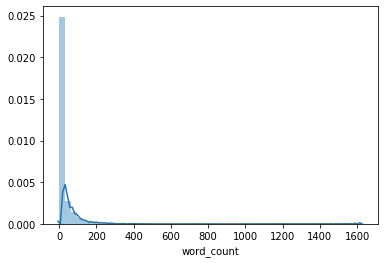

In [370]:
sns.distplot(space_wars['word_count'])


In [488]:
# Borrowing from Noelle's nlp II lesson, import the following, 
# and think about what you want to use in the presentation

# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Text Feature Extraction

## Follow along in the NLP EDA II video and do some analysis

In [489]:
X_train_df = pd.DataFrame(train_data_features.toarray(),
                         columns=cntv.get_feature_names())
X_train_df

,00,000,00000,00000000,0000000003,00000u,0003,00071316,000mph,0037,...,zones,zoo,zoom,zoomed,zpods,zubrin,zvezda,zzz,ﾟヮﾟ,𝓷𝓲𝓬𝓮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [490]:
X_train_df['subreddit']

0        0
1        0
2        0
3        0
4        0
        ..
10222    0
10223    0
10224    0
10225    0
10226    0
Name: subreddit, Length: 10227, dtype: int64

In [373]:
# get count of top-occurring words

# empty dictionary
top_words = {}

# loop through columns
for i in X_train_df.columns:
    # save sum of each column in dictionary
    top_words[i] =  X_train_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [374]:
most_freq.head()

,0,1
0,the,9966
1,to,6894
2,and,4787
3,replace_me,3978
4,of,3867


In [376]:
# Make a different CountVectorizer

count_v = CountVectorizer(analyzer='word',
                       stop_words = stopwords,
                      max_features = 1_000,
                      min_df = 50,
                      max_df = .80,
                      ngram_range=(2,3),
                      )

In [377]:
# Redefine the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .1,
                                                   stratify = y,
                                                   random_state=42)

In [378]:
baseline

0.5682102628285357

## Implement Naive Bayes because it's in the project instructions
Multinomial Naive Bayes often outperforms other models despite text data being non-independent data

In [449]:
pipe = Pipeline([
    ('count_v', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [464]:
pipe_params = {
    'count_v__max_features': [2000, 5000, 9000],
    'count_v__stop_words': [stopwords],
    'count_v__min_df': [2, 3, 10],
    'count_v__max_df': [.9, .8, .7],
    'count_v__ngram_range': [(1, 1), (1, 2)]
}

In [465]:
gs = GridSearchCV(pipe,
                  pipe_params,
                  cv = 5,
                  n_jobs=6
)

In [466]:
%%time
gs.fit(X_train, y_train)

Wall time: 51 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('count_v',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        p

In [467]:
gs.best_params_

{'count_v__max_df': 0.9,
 'count_v__max_features': 9000,
 'count_v__min_df': 2,
 'count_v__ngram_range': (1, 1),
 'count_v__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'abo

In [468]:
print(gs.best_score_)

0.7892220773576706


In [469]:
gs.score(X_train, y_train)

0.8046936114732725

In [470]:
gs.score(X_test, y_test)

0.7928068803752932

So far, the Multinomial Naive Bayes Algorithm is the top function at 79.28% Accuracy.  The confusion matrix below is very simiar to that of other models

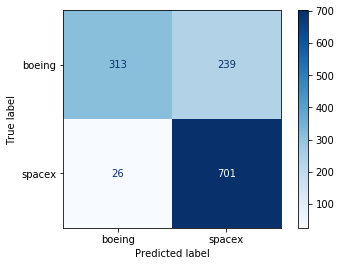

In [471]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# View confusion matrix

plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');

In [472]:
# Calculate the specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.5670289855072463


None of the 1620 different models we tried in this pipeline performed noticibly better than the thrown-together Logistic Regression Classifier that we started out with.  Let's try TF-IDF, then Random Cut Forest, and finally Vector Machines. Our last run brought the best accuracy score to 79.3%

# TF-IDF

In [431]:
# Redefine the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .1,
                                                   stratify = y,
                                                   random_state=42)

In [432]:
tvec = TfidfVectorizer(stop_words=stopwords)

In [433]:
df = pd.DataFrame(tvec.fit_transform(X_train).toarray(),
                 columns=tvec.get_feature_names())
df.head()

,00000,00000000,0000000003,00000u,0003,00071316,000ft,000mph,0037,0038,...,zoo,zoom,zoomed,zpods,zubrin,zuma,zvezda,zzz,ﾟヮﾟ,𝓷𝓲𝓬𝓮
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


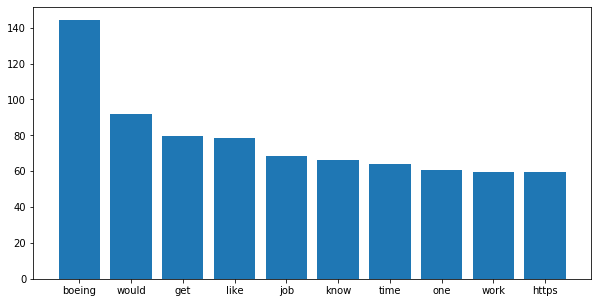

In [434]:
# get count of top-occurring words
top_words_tf = {}
for i in df.columns:
    top_words_tf[i] =  df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_tf = pd.DataFrame(sorted(top_words_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_freq_tf[0][:10], most_freq_tf[1][:10]);

In [435]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [436]:
pipe_params_tvec = {
    'tvec__max_features': [2000, 9000],
    'tvec__stop_words' : [None, stopwords],
    'tvec__ngram_range': [(1, 1), (1, 2)]
}

In [437]:
gs_tvec = GridSearchCV(pipe_tvec, pipe_params_tvec, cv = 5)

In [438]:
%%time
gs_tvec.fit(X_train, y_train)

Wall time: 39.5 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [439]:
gs_tvec.best_params_

{'tvec__max_features': 9000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in

In [440]:
gs_tvec.score(X_train, y_train)

0.8116471099521947

In [442]:
gs_tvec.score(X_test, y_test)

0.7873338545738858

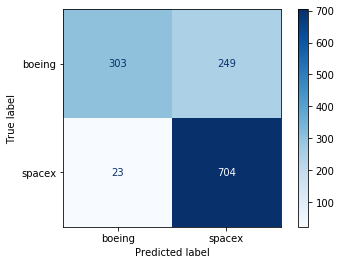

In [447]:
# Get predictions
preds = gs_tvec.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# View confusion matrix

plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Blues', values_format='d');

In [448]:
# Calculate the specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.5489130434782609


## Random Cut Forest, Bagging, and Support Vector Machines 

In [473]:
from sklearn.ensemble        import RandomForestClassifier, ExtraTreesClassifier

Before we run the decision tree model or RandomForestClassifier(), we need to convert all of the data to numeric data

In [480]:
rf = RandomForestClassifier()

In [481]:
et = ExtraTreesClassifier()

In [491]:
cross_val_score(rf, train_data_features, X_train_df['subreddit']).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.9977510414500713

In [492]:
cross_val_score(et, train_data_features, X_train_df['subreddit']).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.9977510414500713

In [494]:
#cross_val_score(rf, test_data_features, y_test).mean()

## Make sure that we are using X and y data that are completely numeric and free of nulls

In [498]:
space_wars.head(1)

,subreddit,body,permalink,word_count,post_length
0,NaN,Anyone know what the salary range is for indiv...,/r/boeing/comments/hhz2g3/employeeemployment_q...,40,223


In [500]:
space_wars.shape

(12784, 5)

In [504]:
pipe_rf = Pipeline([
    ('count_v', CountVectorizer()),
    ('rf', RandomForestClassifier()),
])

pipe_ef = Pipeline([
    ('count_v', CountVectorizer()),
    ('ef', ExtraTreesClassifier()),
])

In [505]:
pipe_params =
    'count_v__max_features': [2000, 5000, 9000],
    'count_v__stop_words': [stopwords],
    'count_v__min_df': [2, 3, 10],
    'count_v__max_df': [.9, .8, .7],
    'count_v__ngram_range': [(1, 1), (1, 2)]
}

In [512]:
%%time
gs_rf = GridSearchCV(pipe_rf,
                  pipe_params,
                  cv = 5,
                  n_jobs=6)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
gs_rf.best_params_

0.7620165145588874
Wall time: 5min 27s


{'count_v__max_df': 0.8,
 'count_v__max_features': 9000,
 'count_v__min_df': 2,
 'count_v__ngram_range': (1, 2),
 'count_v__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'abo

In [531]:
gs_rf.score(X_train, y_train)

0.8334637114298131

In [537]:
gs_rf.score(X_test, y_test)

0.7560594214229867

In [538]:
# %%time
# gs_ef = GridSearchCV(pipe_ef,
#                   pipe_params,
#                   cv = 5,
#                   n_jobs=6)
# gs_ef.fit(X_train, y_train)
# print(gs_ef.best_score_)
# gs_ef.best_params_

In [540]:
#gs_ef.score(X_train, y_train)

In [541]:
#gs_ef.score(X_test, y_test)

## Now run through Gradient Boosting and SVM

In [546]:
from sklearn.ensemble      import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors     import KNeighborsClassifier


Using samples from Riley's Lessons:


In [543]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [544]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Use the CountVectorizer to convert the data to numeric data prior to running it through the below VotingClassifier

In [ ]:
'count_v__max_df': 0.9,
 'count_v__max_features': 9000,
 'count_v__min_df': 2,
 'count_v__ngram_range': (1, 1),

In [547]:
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
%%time

vote = VotingClassifier([
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
    ('grad_boost', GradientBoostingClassifier()),
    ('tree', DecisionTreeClassifier()),
    ('knn_pipe', knn_pipe)
])
params = {}
#     'ada__n_estimators': [50, 51],
#     'grad_boost__n_estimators': [10, 11],
#     'knn_pipe__knn__n_neighbors': [5],
#     'ada__base_estimator__max_depth': [1, 2],
#     'weights': [[.25] * 4, [.3, .3, .3, .1]]
# }
gs = GridSearchCV(vote, param_grid=params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_